This code is used to process the data set we found online. This data set is for women's tennis matches,we have also processed it.

/var/folders/s0/_m13xvgj0y9_pg386fxb3g5w0000gn/T/ipykernel_21813/1111885602.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Epoch 10/250, Loss: 0.7151
Epoch 20/250, Loss: 0.7054
Epoch 30/250, Loss: 0.6986
Epoch 40/250, Loss: 0.6942
Epoch 50/250, Loss: 0.6915
Epoch 60/250, Loss: 0.6900
Epoch 70/250, Loss: 0.6890
Epoch 80/250, Loss: 0.6882
Epoch 90/250, Loss: 0.6875
Epoch 100/250, Loss: 0.6868
Epoch 110/250, Loss: 0.6861
Epoch 120/250, Loss: 0.6855
Epoch 130/250, Loss: 0.6849
Epoch 140/250, Loss: 0.6843
Epoch 150/250, Loss: 0.6837
Epoch 160/250, Loss: 0.6832
Epoch 170/250, Loss: 0.6828
Epoch 180/250, Loss: 0.6823
Epoch 190/250, Loss: 0.6819
Epoch 200/250, Loss: 0.6815
Epoch 210/250, Loss: 0.6811
Epoch 220/250, Loss: 0.6808
Epoch 230/250, Loss: 0.6804
Epoch 240/250, Loss: 0.6801
Epoch 250/250, Loss: 0.6797


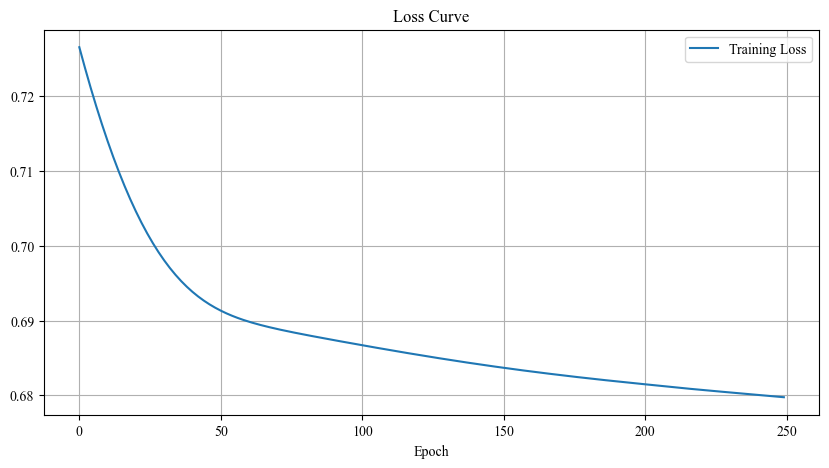

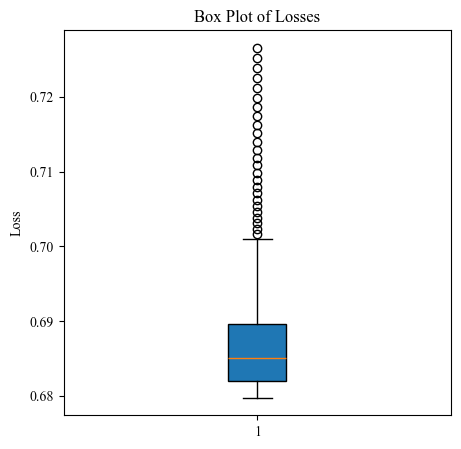

Accuracy: 0.6034
Model parameters saved to /Users/curryyang/code/2024_MCM_C_UESTC/modle/set_predictor_model_female.pth
SetPredictor(
  (fc1): Linear(in_features=14, out_features=28, bias=True)
  (fc2): Linear(in_features=28, out_features=14, bias=True)
  (fc3): Linear(in_features=14, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
[[ 0.17720944  0.25916246 -0.2510944   0.35721037  0.15063424  0.2824252
   0.2135666   0.15658905 -0.26887095  0.13304818  0.16832492 -0.10843773
   0.02291622 -0.07592368]
 [ 0.04342146  0.3450507  -0.1154628   0.3265225   0.00245398  0.02673406
   0.19949362  0.15426886 -0.20780188  0.12050998 -0.12567973 -0.1355251
  -0.23213746  0.25179994]
 [-0.10120162  0.3540943  -0.10726549 -0.17660925 -0.01512408 -0.01835377
  -0.27428517 -0.09606446  0.1225815   0.06671509 -0.15993975 -0.03202727
  -0.07407492 -0.07329433]
 [-0.28164694  0.38662162 -0.10198897  0.28009614 -0.36098257 -0.3173824
  -0.22017542 -0.23064338  0.1691982   0.35701388 -0.19884016  0.21

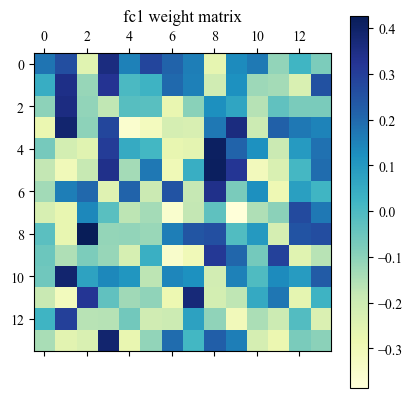

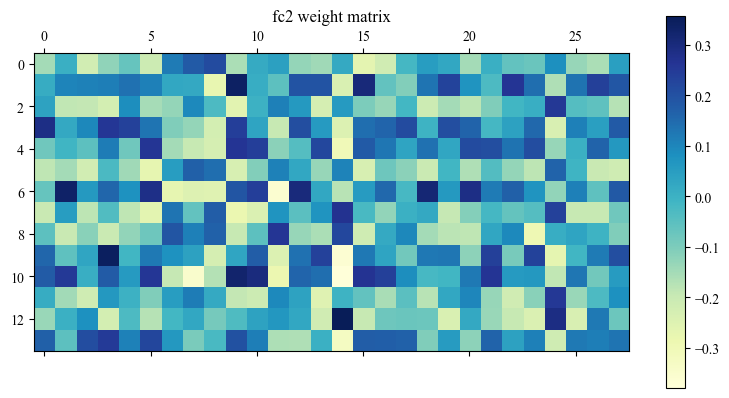

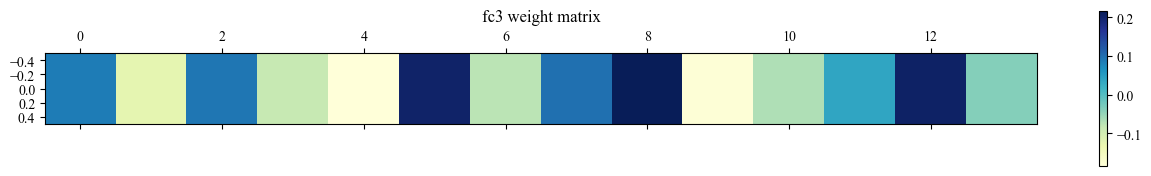

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('/Users/curryyang/code/2024_MCM_C_UESTC/processed_datasets/female_processed.csv')

# 选择特征和预处理
features = data[['p1_ace', 'p2_ace', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err','PointServer','Speed_KMH','p1_net_pt','p2_net_pt','p1_distance_run','p2_distance_run']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 构造每个set的胜者标签（简化逻辑）
# 假设set的胜者是在该set中得分更多的玩家
# 注意：这里的逻辑可能需要根据实际数据和规则进行调整
set_winner = (data['SetWinner'] == 1).astype(int)

# 划分数据集（这里我们简化，直接使用行号进行划分）
X_train, X_test = features_scaled[:4391], features_scaled[4391:]
y_train, y_test = set_winner[:4391], set_winner[4391:]

# 将NumPy数组转换为Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# 神经网络定义
class SetPredictor(nn.Module):
    def __init__(self):
        super(SetPredictor, self).__init__()
        self.fc1 = nn.Linear(14, 28)
        self.fc2 = nn.Linear(28, 14)
        self.fc3 = nn.Linear(14, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# 实例化模型、定义损失函数和优化器
model = SetPredictor()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 250
epoch_loss = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    epoch_loss.append(loss.item())


    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10, 5))
plt.plot(epoch_loss, label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.boxplot(epoch_loss, vert=True, patch_artist=True)
plt.title('Box Plot of Losses')
plt.ylabel('Loss')
plt.show()

# 简单评估模型
model.eval()
with torch.no_grad():
    outputs0 = model(X_train_tensor).squeeze()
    outputs = model(X_test_tensor).squeeze()
    predictions = (outputs >= 0.5).float()
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy:.4f}')
features_array = np.append(X_train_tensor.numpy(), X_test_tensor.numpy(), axis=0)
predictions_array = np.append(outputs0.numpy(), outputs.numpy(), axis=0)
export_data = np.hstack((features_array, predictions_array.reshape(-1, 1)))
features_original = scaler.inverse_transform(features_array)
export_df = pd.DataFrame(features_original, columns=['p1_ace', 'p2_ace', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err','PointServer','Speed_KMH','p1_net_pt','p2_net_pt','p1_distance_run','p2_distance_run'])
export_df['Predicted_Value'] = predictions_array

# 导出DataFrame为CSV文件
export_df.to_csv('/Users/curryyang/code/2024_MCM_C_UESTC/exported_datasets/femal_exported.csv', index=False)


# 模型保存路径
model_path = '/Users/curryyang/code/2024_MCM_C_UESTC/modle/set_predictor_model_female.pth'

# 保存模型的状态字典
torch.save(model.state_dict(), model_path)

print(f'Model parameters saved to {model_path}')

import torch
import torchvision.models as models

# 加载权重
model.load_state_dict(torch.load('/Users/curryyang/code/2024_MCM_C_UESTC/modle/set_predictor_model_female.pth'))

model.eval()

print(model)

import matplotlib.pyplot as plt

weights1 = model.fc1.weight.data.numpy()
weights2 = model.fc2.weight.data.numpy()
weights3 = model.fc3.weight.data.numpy()

# 选择权重的一个子集进行可视化
weights_subset1 = weights1[:14]
weights_subset2 = weights2[:28]
weights_subset3 = weights3[:14]
print(weights_subset1)
print(weights_subset2)
print(weights_subset3)
plt.matshow(weights_subset1, cmap='YlGnBu')  # 选择一个颜色映射
plt.colorbar() # 显示颜色条
plt.title('fc1 weight matrix')
plt.matshow(weights_subset2, cmap='YlGnBu') 
plt.colorbar() 
plt.title('fc2 weight matrix')
plt.matshow(weights_subset3, cmap='YlGnBu') 
plt.colorbar() 
plt.title('fc3 weight matrix')

# 显示图像
plt.show()

